In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [4]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Accuracy: 0.9995435553526912
Precision: 0.9166666666666666
Recall: 0.7674418604651163
F1-score: 0.8354430379746836
ROC AUC: 0.8836681839072188


In [3]:
import shap

explainer = shap.KernelExplainer(knn_classifier.predict_proba, shap.kmeans(X_train_scaled, 1000))
target_index = 544

for target_index in range(10):  
 shap_values = explainer.shap_values(X_test_scaled[target_index:target_index+1])

 feature_names = np.array(["Feature " + str(i) for i in range(X_train.shape[1])])
 print("\nSHAP Values for Target Data Point (index", target_index, "):")
 for i in range(len(feature_names)):
   print(f"{feature_names[i]}: {shap_values[0][i]}")


Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 0 ):
Feature 0: [-0.00011621  0.00011621]
Feature 1: [-5.12544419e-05  5.12544419e-05]
Feature 2: [-2.3181814e-05  2.3181814e-05]
Feature 3: [ 1.43986254e-05 -1.43986254e-05]
Feature 4: [-3.47149367e-05  3.47149367e-05]
Feature 5: [0. 0.]
Feature 6: [-3.96025409e-05  3.96025409e-05]
Feature 7: [ 2.64081398e-05 -2.64081398e-05]
Feature 8: [-1.47811427e-05  1.47811427e-05]
Feature 9: [-6.59773164e-05  6.59773164e-05]
Feature 10: [ 9.70215827e-05 -9.70215827e-05]
Feature 11: [ 0.00019986 -0.00019986]
Feature 12: [ 6.90636671e-05 -6.90636671e-05]
Feature 13: [-8.66430034e-05  8.66430034e-05]
Feature 14: [ 0.00085167 -0.00085167]
Feature 15: [ 3.50771982e-05 -3.50771982e-05]
Feature 16: [ 7.54577343e-05 -7.54577343e-05]
Feature 17: [ 0.00103131 -0.00103131]
Feature 18: [-7.70699259e-05  7.70699259e-05]
Feature 19: [ 9.48668127e-05 -9.48668127e-05]
Feature 20: [ 6.06742531e-05 -6.06742531e-05]
Feature 21: [ 5.88102752e-05 -5.88102752e-05]
Feature 22:

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 1 ):
Feature 0: [-0.00013904  0.00013904]
Feature 1: [ 2.64154153e-05 -2.64154153e-05]
Feature 2: [-6.93132769e-05  6.93132769e-05]
Feature 3: [ 3.0702815e-05 -3.0702815e-05]
Feature 4: [ 5.94756884e-05 -5.94756884e-05]
Feature 5: [ 7.03089209e-05 -7.03089209e-05]
Feature 6: [-1.88952257e-05  1.88952257e-05]
Feature 7: [ 9.48645566e-05 -9.48645566e-05]
Feature 8: [ 2.5994951e-05 -2.5994951e-05]
Feature 9: [ 6.80511942e-05 -6.80511942e-05]
Feature 10: [ 9.16063879e-05 -9.16063879e-05]
Feature 11: [ 8.24779005e-05 -8.24779005e-05]
Feature 12: [ 0.00022092 -0.00022092]
Feature 13: [ 3.16290314e-05 -3.16290314e-05]
Feature 14: [ 0.00076742 -0.00076742]
Feature 15: [ 0.00012374 -0.00012374]
Feature 16: [ 1.26948962e-05 -1.26948962e-05]
Feature 17: [ 0.00034656 -0.00034656]
Feature 18: [-9.97596491e-05  9.97596491e-05]
Feature 19: [ 4.31597758e-05 -4.31597758e-05]
Feature 20: [ 2.09510768e-05 -2.09510768e-05]
Feature 21: [-2.62882595e-05  2.62882595e

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 2 ):
Feature 0: [ 2.14535386e-05 -2.14535386e-05]
Feature 1: [ 6.11959379e-05 -6.11959379e-05]
Feature 2: [ 1.77850302e-05 -1.77850302e-05]
Feature 3: [ 4.90910261e-05 -4.90910261e-05]
Feature 4: [ 0.00014809 -0.00014809]
Feature 5: [ 2.23871422e-05 -2.23871422e-05]
Feature 6: [-1.33533e-05  1.33533e-05]
Feature 7: [ 8.50912784e-05 -8.50912784e-05]
Feature 8: [-2.00258421e-05  2.00258421e-05]
Feature 9: [ 0.00014571 -0.00014571]
Feature 10: [ 0.00053681 -0.00053681]
Feature 11: [ 5.12007024e-05 -5.12007024e-05]
Feature 12: [ 9.71274913e-05 -9.71274913e-05]
Feature 13: [ 4.28694165e-06 -4.28694165e-06]
Feature 14: [ 0.00021805 -0.00021805]
Feature 15: [ 3.41252703e-05 -3.41252703e-05]
Feature 16: [ 7.68885111e-05 -7.68885111e-05]
Feature 17: [ 0.00022165 -0.00022165]
Feature 18: [ 3.50732651e-06 -3.50732651e-06]
Feature 19: [ 5.47145402e-05 -5.47145402e-05]
Feature 20: [ 2.25735444e-05 -2.25735444e-05]
Feature 21: [ 2.24577791e-05 -2.24577791e-0

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 3 ):
Feature 0: [-1.34911403e-05  1.34911403e-05]
Feature 1: [ 5.96493479e-05 -5.96493479e-05]
Feature 2: [ 4.02594728e-06 -4.02594728e-06]
Feature 3: [ 1.00987276e-05 -1.00987276e-05]
Feature 4: [ 0.00017386 -0.00017386]
Feature 5: [ 2.52039418e-05 -2.52039418e-05]
Feature 6: [-6.17865783e-05  6.17865783e-05]
Feature 7: [ 1.01336015e-05 -1.01336015e-05]
Feature 8: [ 3.87848027e-06 -3.87848027e-06]
Feature 9: [0. 0.]
Feature 10: [ 0.00011736 -0.00011736]
Feature 11: [ 0.00017949 -0.00017949]
Feature 12: [ 0.00015462 -0.00015462]
Feature 13: [ 6.49006181e-05 -6.49006181e-05]
Feature 14: [ 0.00070212 -0.00070212]
Feature 15: [ 6.19732632e-05 -6.19732632e-05]
Feature 16: [ 9.03899071e-05 -9.03899071e-05]
Feature 17: [ 0.00022842 -0.00022842]
Feature 18: [ 7.81144531e-06 -7.81144531e-06]
Feature 19: [ 4.56034686e-05 -4.56034686e-05]
Feature 20: [-2.3820107e-05  2.3820107e-05]
Feature 21: [ 1.05827092e-05 -1.05827092e-05]
Feature 22: [-4.20819732e-0

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 4 ):
Feature 0: [ 3.48357294e-05 -3.48357294e-05]
Feature 1: [0. 0.]
Feature 2: [-3.84802456e-05  3.84802456e-05]
Feature 3: [ 7.14708741e-05 -7.14708741e-05]
Feature 4: [ 0.00012688 -0.00012688]
Feature 5: [0. 0.]
Feature 6: [-4.93050911e-05  4.93050911e-05]
Feature 7: [ 3.16979602e-05 -3.16979602e-05]
Feature 8: [-3.08987639e-05  3.08987639e-05]
Feature 9: [ 7.94767342e-05 -7.94767342e-05]
Feature 10: [ 0.00011406 -0.00011406]
Feature 11: [ 9.93831983e-05 -9.93831983e-05]
Feature 12: [ 0.00015609 -0.00015609]
Feature 13: [ 1.71595551e-05 -1.71595551e-05]
Feature 14: [ 0.00066606 -0.00066606]
Feature 15: [ 4.62252787e-05 -4.62252787e-05]
Feature 16: [ 5.4551047e-05 -5.4551047e-05]
Feature 17: [ 0.00032997 -0.00032997]
Feature 18: [-5.14968238e-05  5.14968238e-05]
Feature 19: [ 9.66989216e-05 -9.66989216e-05]
Feature 20: [ 2.0368116e-05 -2.0368116e-05]
Feature 21: [0. 0.]
Feature 22: [ 0.00015208 -0.00015208]
Feature 23: [-3.47453294e-05  3.474

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 5 ):
Feature 0: [ 0.00012045 -0.00012045]
Feature 1: [ 4.18108754e-05 -4.18108754e-05]
Feature 2: [ 1.464316e-05 -1.464316e-05]
Feature 3: [ 5.16963254e-05 -5.16963254e-05]
Feature 4: [ 0.00010853 -0.00010853]
Feature 5: [ 2.56256223e-05 -2.56256223e-05]
Feature 6: [-7.10080773e-05  7.10080773e-05]
Feature 7: [ 2.57694681e-05 -2.57694681e-05]
Feature 8: [-1.72283084e-05  1.72283084e-05]
Feature 9: [ 1.45988434e-05 -1.45988434e-05]
Feature 10: [ 0.00013295 -0.00013295]
Feature 11: [ 8.6321236e-05 -8.6321236e-05]
Feature 12: [ 0.00022011 -0.00022011]
Feature 13: [ 6.16684837e-06 -6.16684837e-06]
Feature 14: [ 0.00042973 -0.00042973]
Feature 15: [ 6.66545674e-05 -6.66545674e-05]
Feature 16: [ 0.00016218 -0.00016218]
Feature 17: [ 0.0003579 -0.0003579]
Feature 18: [-5.15176746e-05  5.15176746e-05]
Feature 19: [ 5.12246452e-05 -5.12246452e-05]
Feature 20: [-1.33408988e-05  1.33408988e-05]
Feature 21: [ 0.00012274 -0.00012274]
Feature 22: [0. 0.]
Fea

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 6 ):
Feature 0: [ 0.00010881 -0.00010881]
Feature 1: [-2.33669753e-05  2.33669753e-05]
Feature 2: [0. 0.]
Feature 3: [0. 0.]
Feature 4: [ 0.00014199 -0.00014199]
Feature 5: [ 3.31261646e-05 -3.31261646e-05]
Feature 6: [-3.29722132e-05  3.29722132e-05]
Feature 7: [ 2.2842299e-05 -2.2842299e-05]
Feature 8: [ 2.31716512e-05 -2.31716512e-05]
Feature 9: [0. 0.]
Feature 10: [ 0.00011613 -0.00011613]
Feature 11: [ 0.00012602 -0.00012602]
Feature 12: [ 0.00013627 -0.00013627]
Feature 13: [0. 0.]
Feature 14: [ 0.00064246 -0.00064246]
Feature 15: [ 0.00010948 -0.00010948]
Feature 16: [ 0.0001354 -0.0001354]
Feature 17: [ 0.00022905 -0.00022905]
Feature 18: [-7.76737376e-05  7.76737376e-05]
Feature 19: [ 2.31437689e-05 -2.31437689e-05]
Feature 20: [0. 0.]
Feature 21: [ 1.01091807e-05 -1.01091807e-05]
Feature 22: [-2.91145157e-05  2.91145157e-05]
Feature 23: [ 1.57711703e-05 -1.57711703e-05]
Feature 24: [ 4.47483764e-05 -4.47483764e-05]
Feature 25: [-9.997

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 7 ):
Feature 0: [ 2.60554302e-05 -2.60554302e-05]
Feature 1: [-3.54063767e-05  3.54063767e-05]
Feature 2: [-1.27023037e-05  1.27023037e-05]
Feature 3: [ 2.78570367e-05 -2.78570367e-05]
Feature 4: [ 9.38764907e-05 -9.38764907e-05]
Feature 5: [ 2.46131328e-05 -2.46131328e-05]
Feature 6: [-2.16345682e-05  2.16345682e-05]
Feature 7: [ 2.15511795e-05 -2.15511795e-05]
Feature 8: [ 1.32650521e-05 -1.32650521e-05]
Feature 9: [ 7.781198e-05 -7.781198e-05]
Feature 10: [ 0.00011531 -0.00011531]
Feature 11: [ 0.00013407 -0.00013407]
Feature 12: [ 0.0001056 -0.0001056]
Feature 13: [ 5.2576802e-05 -5.2576802e-05]
Feature 14: [ 0.0006995 -0.0006995]
Feature 15: [ 8.63864293e-05 -8.63864293e-05]
Feature 16: [ 8.95505068e-05 -8.95505068e-05]
Feature 17: [ 0.00025292 -0.00025292]
Feature 18: [-3.48757777e-05  3.48757777e-05]
Feature 19: [ 6.57075166e-05 -6.57075166e-05]
Feature 20: [ 9.91216578e-06 -9.91216578e-06]
Feature 21: [ 1.01974527e-05 -1.01974527e-05]
F

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 8 ):
Feature 0: [-1.67380645e-05  1.67380645e-05]
Feature 1: [-4.35572415e-05  4.35572415e-05]
Feature 2: [ 3.83711763e-05 -3.83711763e-05]
Feature 3: [ 3.80361242e-05 -3.80361242e-05]
Feature 4: [ 7.11471435e-05 -7.11471435e-05]
Feature 5: [-8.63905768e-06  8.63905768e-06]
Feature 6: [-3.86302389e-05  3.86302389e-05]
Feature 7: [ 0.00034132 -0.00034132]
Feature 8: [ 5.51950249e-05 -5.51950249e-05]
Feature 9: [ 0.00026505 -0.00026505]
Feature 10: [ 5.55228556e-05 -5.55228556e-05]
Feature 11: [ 0.00029436 -0.00029436]
Feature 12: [ 0.00021611 -0.00021611]
Feature 13: [ 5.76112098e-05 -5.76112098e-05]
Feature 14: [ 0.00039702 -0.00039702]
Feature 15: [ 4.64264795e-05 -4.64264795e-05]
Feature 16: [-5.9489997e-05  5.9489997e-05]
Feature 17: [ 0.00034533 -0.00034533]
Feature 18: [-7.8364681e-05  7.8364681e-05]
Feature 19: [ 6.21247647e-05 -6.21247647e-05]
Feature 20: [-5.43455409e-05  5.43455409e-05]
Feature 21: [ 2.18771092e-05 -2.18771092e-05]
Fea

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 9 ):
Feature 0: [0. 0.]
Feature 1: [-1.56240471e-05  1.56240471e-05]
Feature 2: [-3.19705212e-05  3.19705212e-05]
Feature 3: [ 3.83021029e-05 -3.83021029e-05]
Feature 4: [ 5.53139573e-05 -5.53139573e-05]
Feature 5: [ 3.62617868e-05 -3.62617868e-05]
Feature 6: [-0.0001576  0.0001576]
Feature 7: [ 3.53462282e-05 -3.53462282e-05]
Feature 8: [-1.98850357e-05  1.98850357e-05]
Feature 9: [ 6.89169046e-06 -6.89169046e-06]
Feature 10: [ 0.00010755 -0.00010755]
Feature 11: [ 0.00021629 -0.00021629]
Feature 12: [ 6.63129087e-05 -6.63129087e-05]
Feature 13: [ 3.67995276e-05 -3.67995276e-05]
Feature 14: [ 0.00074335 -0.00074335]
Feature 15: [ 0.00014916 -0.00014916]
Feature 16: [ 0.00016887 -0.00016887]
Feature 17: [ 0.00030317 -0.00030317]
Feature 18: [-4.26846686e-05  4.26846686e-05]
Feature 19: [ 9.3584598e-05 -9.3584598e-05]
Feature 20: [0. 0.]
Feature 21: [ 2.14075317e-05 -2.14075317e-05]
Feature 22: [0. 0.]
Feature 23: [-1.3329212e-05  1.3329212e-05]

In [4]:
import shap

explainer = shap.KernelExplainer(knn_classifier.predict_proba, shap.kmeans(X_train_scaled, 1000))
target_index = 744

for target_index in range(10):  
 shap_values = explainer.shap_values(X_test_scaled[target_index:target_index+1])

 feature_names = np.array(["Feature " + str(i) for i in range(X_train.shape[1])])
 print("\nSHAP Values for Target Data Point (index", target_index, "):")
 for i in range(len(feature_names)):
   print(f"{feature_names[i]}: {shap_values[0][i]}")

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 0 ):
Feature 0: [-0.00014567  0.00014567]
Feature 1: [ 2.77453068e-05 -2.77453068e-05]
Feature 2: [0. 0.]
Feature 3: [-3.03401193e-05  3.03401193e-05]
Feature 4: [ 1.19278587e-05 -1.19278587e-05]
Feature 5: [-5.27383248e-05  5.27383248e-05]
Feature 6: [-5.02543448e-05  5.02543448e-05]
Feature 7: [ 5.62311764e-05 -5.62311764e-05]
Feature 8: [-5.22244855e-05  5.22244855e-05]
Feature 9: [-1.67264128e-05  1.67264128e-05]
Feature 10: [ 0.00012258 -0.00012258]
Feature 11: [ 0.00019347 -0.00019347]
Feature 12: [ 1.84641715e-05 -1.84641715e-05]
Feature 13: [-8.91575823e-05  8.91575823e-05]
Feature 14: [ 0.00076618 -0.00076618]
Feature 15: [ 7.28083497e-05 -7.28083497e-05]
Feature 16: [ 0.00012625 -0.00012625]
Feature 17: [ 0.00102261 -0.00102261]
Feature 18: [-0.00011672  0.00011672]
Feature 19: [ 9.68697713e-05 -9.68697713e-05]
Feature 20: [ 4.76816543e-05 -4.76816543e-05]
Feature 21: [ 8.81542563e-05 -8.81542563e-05]
Feature 22: [-7.91471468e-05  7.9

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 1 ):
Feature 0: [-0.00015984  0.00015984]
Feature 1: [-2.77418228e-05  2.77418228e-05]
Feature 2: [-3.01799519e-05  3.01799519e-05]
Feature 3: [ 3.91619678e-05 -3.91619678e-05]
Feature 4: [ 8.49531531e-05 -8.49531531e-05]
Feature 5: [ 5.8813562e-05 -5.8813562e-05]
Feature 6: [-1.88320412e-05  1.88320412e-05]
Feature 7: [ 6.9808035e-05 -6.9808035e-05]
Feature 8: [-4.52192067e-05  4.52192067e-05]
Feature 9: [ 2.76774806e-05 -2.76774806e-05]
Feature 10: [ 6.27363486e-05 -6.27363486e-05]
Feature 11: [ 0.00014182 -0.00014182]
Feature 12: [ 0.00021479 -0.00021479]
Feature 13: [ 7.85314425e-05 -7.85314425e-05]
Feature 14: [ 0.00076232 -0.00076232]
Feature 15: [ 0.00018981 -0.00018981]
Feature 16: [ 3.82665463e-05 -3.82665463e-05]
Feature 17: [ 0.00037066 -0.00037066]
Feature 18: [-0.0001106  0.0001106]
Feature 19: [-2.26104602e-05  2.26104602e-05]
Feature 20: [-2.0833683e-05  2.0833683e-05]
Feature 21: [-1.48863103e-05  1.48863103e-05]
Feature 22: [ 9

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 2 ):
Feature 0: [ 1.47309558e-05 -1.47309558e-05]
Feature 1: [ 5.27474782e-05 -5.27474782e-05]
Feature 2: [ 4.02614071e-05 -4.02614071e-05]
Feature 3: [ 4.40327517e-05 -4.40327517e-05]
Feature 4: [ 0.00017245 -0.00017245]
Feature 5: [ 1.40997889e-05 -1.40997889e-05]
Feature 6: [-7.43328727e-05  7.43328727e-05]
Feature 7: [ 5.2763779e-05 -5.2763779e-05]
Feature 8: [-4.84878511e-05  4.84878511e-05]
Feature 9: [ 0.00017297 -0.00017297]
Feature 10: [ 0.0005757 -0.0005757]
Feature 11: [ 7.60157294e-06 -7.60157294e-06]
Feature 12: [ 0.00013818 -0.00013818]
Feature 13: [0. 0.]
Feature 14: [ 0.00020118 -0.00020118]
Feature 15: [ 9.50714959e-05 -9.50714959e-05]
Feature 16: [ 5.41998731e-05 -5.41998731e-05]
Feature 17: [ 0.00021083 -0.00021083]
Feature 18: [0. 0.]
Feature 19: [ 6.94987743e-05 -6.94987743e-05]
Feature 20: [ 3.77937253e-05 -3.77937253e-05]
Feature 21: [ 6.83271619e-06 -6.83271619e-06]
Feature 22: [ 2.10947285e-05 -2.10947285e-05]
Feature 2

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 3 ):
Feature 0: [-1.57471803e-05  1.57471803e-05]
Feature 1: [ 4.94382826e-05 -4.94382826e-05]
Feature 2: [ 1.43773774e-05 -1.43773774e-05]
Feature 3: [ 5.41191598e-05 -5.41191598e-05]
Feature 4: [ 0.00014395 -0.00014395]
Feature 5: [ 4.59243042e-05 -4.59243042e-05]
Feature 6: [-5.95876129e-05  5.95876129e-05]
Feature 7: [ 1.31433268e-05 -1.31433268e-05]
Feature 8: [ 2.740676e-05 -2.740676e-05]
Feature 9: [ 9.29426193e-06 -9.29426193e-06]
Feature 10: [ 0.00013341 -0.00013341]
Feature 11: [ 0.0001453 -0.0001453]
Feature 12: [ 0.00015786 -0.00015786]
Feature 13: [ 6.23810142e-05 -6.23810142e-05]
Feature 14: [ 0.00067468 -0.00067468]
Feature 15: [ 3.89700219e-05 -3.89700219e-05]
Feature 16: [ 6.46039146e-05 -6.46039146e-05]
Feature 17: [ 0.00022753 -0.00022753]
Feature 18: [0. 0.]
Feature 19: [ 5.46709267e-05 -5.46709267e-05]
Feature 20: [-1.90723646e-05  1.90723646e-05]
Feature 21: [0. 0.]
Feature 22: [-2.5200745e-05  2.5200745e-05]
Feature 23: [

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 4 ):
Feature 0: [-2.64283981e-05  2.64283981e-05]
Feature 1: [-1.67141191e-05  1.67141191e-05]
Feature 2: [-3.78934799e-05  3.78934799e-05]
Feature 3: [ 3.95484087e-05 -3.95484087e-05]
Feature 4: [ 0.00014196 -0.00014196]
Feature 5: [ 4.16267396e-05 -4.16267396e-05]
Feature 6: [-5.26017706e-05  5.26017706e-05]
Feature 7: [ 6.25323059e-05 -6.25323059e-05]
Feature 8: [-3.16445957e-05  3.16445957e-05]
Feature 9: [ 7.77932502e-05 -7.77932502e-05]
Feature 10: [ 0.00012319 -0.00012319]
Feature 11: [ 5.61881231e-05 -5.61881231e-05]
Feature 12: [ 0.00012954 -0.00012954]
Feature 13: [ 2.8276916e-05 -2.8276916e-05]
Feature 14: [ 0.00066905 -0.00066905]
Feature 15: [ 5.08692299e-05 -5.08692299e-05]
Feature 16: [ 8.91698975e-05 -8.91698975e-05]
Feature 17: [ 0.00034025 -0.00034025]
Feature 18: [-2.99380477e-05  2.99380477e-05]
Feature 19: [ 6.12435316e-05 -6.12435316e-05]
Feature 20: [-8.6611333e-06  8.6611333e-06]
Feature 21: [-1.84414812e-05  1.84414812e

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 5 ):
Feature 0: [ 0.00018683 -0.00018683]
Feature 1: [ 2.84633586e-05 -2.84633586e-05]
Feature 2: [0. 0.]
Feature 3: [ 2.41351942e-05 -2.41351942e-05]
Feature 4: [ 9.35011343e-05 -9.35011343e-05]
Feature 5: [ 7.02208436e-05 -7.02208436e-05]
Feature 6: [-7.04720485e-05  7.04720485e-05]
Feature 7: [ 0.0001154 -0.0001154]
Feature 8: [ 2.29435922e-05 -2.29435922e-05]
Feature 9: [ 2.07625796e-05 -2.07625796e-05]
Feature 10: [ 0.00015777 -0.00015777]
Feature 11: [ 0.00010989 -0.00010989]
Feature 12: [ 0.0002669 -0.0002669]
Feature 13: [-3.84044615e-05  3.84044615e-05]
Feature 14: [ 0.00035935 -0.00035935]
Feature 15: [ 2.5488919e-05 -2.5488919e-05]
Feature 16: [ 0.00012178 -0.00012178]
Feature 17: [ 0.00031929 -0.00031929]
Feature 18: [-4.30366177e-05  4.30366177e-05]
Feature 19: [ 6.88935287e-05 -6.88935287e-05]
Feature 20: [-4.86193866e-05  4.86193866e-05]
Feature 21: [ 0.00010941 -0.00010941]
Feature 22: [ 1.35787832e-05 -1.35787832e-05]
Feature 2

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 6 ):
Feature 0: [ 8.6350103e-05 -8.6350103e-05]
Feature 1: [ 5.37536945e-06 -5.37536945e-06]
Feature 2: [-1.54627902e-05  1.54627902e-05]
Feature 3: [ 1.90143921e-05 -1.90143921e-05]
Feature 4: [ 0.00015723 -0.00015723]
Feature 5: [ 3.22121237e-05 -3.22121237e-05]
Feature 6: [-2.90268759e-05  2.90268759e-05]
Feature 7: [ 3.46610606e-05 -3.46610606e-05]
Feature 8: [-1.95924728e-05  1.95924728e-05]
Feature 9: [-2.77177782e-05  2.77177782e-05]
Feature 10: [ 0.00013107 -0.00013107]
Feature 11: [ 8.88013633e-05 -8.88013633e-05]
Feature 12: [ 0.00013918 -0.00013918]
Feature 13: [0. 0.]
Feature 14: [ 0.0006693 -0.0006693]
Feature 15: [ 8.08026849e-05 -8.08026849e-05]
Feature 16: [ 9.85276084e-05 -9.85276084e-05]
Feature 17: [ 0.00024458 -0.00024458]
Feature 18: [-6.35105155e-05  6.35105155e-05]
Feature 19: [ 6.61747104e-05 -6.61747104e-05]
Feature 20: [ 1.9144159e-05 -1.9144159e-05]
Feature 21: [-7.89397078e-06  7.89397078e-06]
Feature 22: [-2.1807321

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 7 ):
Feature 0: [ 1.60211216e-05 -1.60211216e-05]
Feature 1: [-3.14672456e-05  3.14672456e-05]
Feature 2: [ 1.18168192e-05 -1.18168192e-05]
Feature 3: [ 2.43881798e-05 -2.43881798e-05]
Feature 4: [ 9.45707952e-05 -9.45707952e-05]
Feature 5: [ 3.88052169e-05 -3.88052169e-05]
Feature 6: [-2.68619268e-05  2.68619268e-05]
Feature 7: [ 2.28973867e-05 -2.28973867e-05]
Feature 8: [ 5.29004266e-06 -5.29004266e-06]
Feature 9: [ 7.16412872e-05 -7.16412872e-05]
Feature 10: [ 0.00011752 -0.00011752]
Feature 11: [ 9.99192802e-05 -9.99192802e-05]
Feature 12: [ 0.00010949 -0.00010949]
Feature 13: [ 6.16069256e-05 -6.16069256e-05]
Feature 14: [ 0.00070135 -0.00070135]
Feature 15: [ 6.74511399e-05 -6.74511399e-05]
Feature 16: [ 8.09955875e-05 -8.09955875e-05]
Feature 17: [ 0.00024803 -0.00024803]
Feature 18: [-4.00343618e-05  4.00343618e-05]
Feature 19: [ 6.82579051e-05 -6.82579051e-05]
Feature 20: [ 5.47360536e-06 -5.47360536e-06]
Feature 21: [ 2.75041632e-05 

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 8 ):
Feature 0: [ 3.43123436e-05 -3.43123436e-05]
Feature 1: [-6.31530228e-05  6.31530228e-05]
Feature 2: [-9.00592312e-06  9.00592312e-06]
Feature 3: [ 4.65425994e-05 -4.65425994e-05]
Feature 4: [ 4.48085564e-05 -4.48085564e-05]
Feature 5: [ 1.18630865e-05 -1.18630865e-05]
Feature 6: [ 1.17014542e-05 -1.17014542e-05]
Feature 7: [ 0.0003198 -0.0003198]
Feature 8: [ 5.42530863e-05 -5.42530863e-05]
Feature 9: [ 0.00022186 -0.00022186]
Feature 10: [ 5.07674165e-05 -5.07674165e-05]
Feature 11: [ 0.00027948 -0.00027948]
Feature 12: [ 0.00019156 -0.00019156]
Feature 13: [ 3.60914141e-05 -3.60914141e-05]
Feature 14: [ 0.00043408 -0.00043408]
Feature 15: [ 3.47898452e-05 -3.47898452e-05]
Feature 16: [-5.12478731e-05  5.12478731e-05]
Feature 17: [ 0.00034609 -0.00034609]
Feature 18: [-8.73815847e-05  8.73815847e-05]
Feature 19: [ 5.87993652e-05 -5.87993652e-05]
Feature 20: [-4.0937296e-05  4.0937296e-05]
Feature 21: [0. 0.]
Feature 22: [ 3.60775313e-05 

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 9 ):
Feature 0: [ 6.43713771e-06 -6.43713771e-06]
Feature 1: [0. 0.]
Feature 2: [-2.23911715e-05  2.23911715e-05]
Feature 3: [ 2.18029731e-05 -2.18029731e-05]
Feature 4: [ 7.68154844e-05 -7.68154844e-05]
Feature 5: [ 2.12162609e-05 -2.12162609e-05]
Feature 6: [-0.00011337  0.00011337]
Feature 7: [ 2.23164465e-05 -2.23164465e-05]
Feature 8: [-2.78232618e-05  2.78232618e-05]
Feature 9: [-1.22106277e-05  1.22106277e-05]
Feature 10: [ 0.00011173 -0.00011173]
Feature 11: [ 0.00020433 -0.00020433]
Feature 12: [ 8.03116841e-05 -8.03116841e-05]
Feature 13: [ 3.19904224e-05 -3.19904224e-05]
Feature 14: [ 0.00074983 -0.00074983]
Feature 15: [ 0.00013992 -0.00013992]
Feature 16: [ 0.00016441 -0.00016441]
Feature 17: [ 0.00031372 -0.00031372]
Feature 18: [-5.39532555e-05  5.39532555e-05]
Feature 19: [ 8.91457254e-05 -8.91457254e-05]
Feature 20: [0. 0.]
Feature 21: [ 1.28461321e-05 -1.28461321e-05]
Feature 22: [-2.07972048e-05  2.07972048e-05]
Feature 23: [

In [5]:
import shap

explainer = shap.KernelExplainer(knn_classifier.predict_proba, shap.kmeans(X_train_scaled, 1000))
target_index = 944

for target_index in range(10):  
 shap_values = explainer.shap_values(X_test_scaled[target_index:target_index+1])

 feature_names = np.array(["Feature " + str(i) for i in range(X_train.shape[1])])
 print("\nSHAP Values for Target Data Point (index", target_index, "):")
 for i in range(len(feature_names)):
   print(f"{feature_names[i]}: {shap_values[0][i]}")

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 0 ):
Feature 0: [-9.55869974e-05  9.55869974e-05]
Feature 1: [0. 0.]
Feature 2: [-3.11405887e-05  3.11405887e-05]
Feature 3: [-4.93569008e-05  4.93569008e-05]
Feature 4: [-4.60238357e-05  4.60238357e-05]
Feature 5: [-5.3760842e-05  5.3760842e-05]
Feature 6: [ 5.43625447e-05 -5.43625447e-05]
Feature 7: [0. 0.]
Feature 8: [-3.89804039e-05  3.89804039e-05]
Feature 9: [-6.85062276e-05  6.85062276e-05]
Feature 10: [ 7.57360548e-05 -7.57360548e-05]
Feature 11: [ 0.00021151 -0.00021151]
Feature 12: [ 5.08819885e-05 -5.08819885e-05]
Feature 13: [-0.00010875  0.00010875]
Feature 14: [ 0.00079662 -0.00079662]
Feature 15: [ 0.00010324 -0.00010324]
Feature 16: [ 8.93348494e-05 -8.93348494e-05]
Feature 17: [ 0.00106725 -0.00106725]
Feature 18: [-0.00011113  0.00011113]
Feature 19: [ 0.00011561 -0.00011561]
Feature 20: [0. 0.]
Feature 21: [ 3.62386084e-05 -3.62386084e-05]
Feature 22: [-7.37780166e-05  7.37780166e-05]
Feature 23: [ 9.63376186e-05 -9.63376186e

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 1 ):
Feature 0: [-0.00015327  0.00015327]
Feature 1: [-2.4686239e-05  2.4686239e-05]
Feature 2: [-2.22492627e-05  2.22492627e-05]
Feature 3: [0. 0.]
Feature 4: [ 4.54355754e-05 -4.54355754e-05]
Feature 5: [ 3.84308213e-05 -3.84308213e-05]
Feature 6: [0. 0.]
Feature 7: [ 5.43082865e-05 -5.43082865e-05]
Feature 8: [-4.85105398e-05  4.85105398e-05]
Feature 9: [-2.16381821e-05  2.16381821e-05]
Feature 10: [ 1.27941229e-05 -1.27941229e-05]
Feature 11: [ 0.00011181 -0.00011181]
Feature 12: [ 0.00025624 -0.00025624]
Feature 13: [ 6.92630811e-05 -6.92630811e-05]
Feature 14: [ 0.00079471 -0.00079471]
Feature 15: [ 0.00017913 -0.00017913]
Feature 16: [-1.36629706e-05  1.36629706e-05]
Feature 17: [ 0.00040233 -0.00040233]
Feature 18: [-0.00015348  0.00015348]
Feature 19: [-3.53961187e-05  3.53961187e-05]
Feature 20: [ 1.75625587e-05 -1.75625587e-05]
Feature 21: [0. 0.]
Feature 22: [ 0.0001032 -0.0001032]
Feature 23: [ 3.49631775e-05 -3.49631775e-05]
Featu

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 2 ):
Feature 0: [ 2.95061509e-05 -2.95061509e-05]
Feature 1: [ 5.35832425e-05 -5.35832425e-05]
Feature 2: [ 1.71786311e-05 -1.71786311e-05]
Feature 3: [ 5.9973388e-05 -5.9973388e-05]
Feature 4: [ 0.00012275 -0.00012275]
Feature 5: [ 1.95320088e-05 -1.95320088e-05]
Feature 6: [-3.27855548e-05  3.27855548e-05]
Feature 7: [ 8.78503191e-05 -8.78503191e-05]
Feature 8: [ 6.73400719e-06 -6.73400719e-06]
Feature 9: [ 0.00016448 -0.00016448]
Feature 10: [ 0.00055574 -0.00055574]
Feature 11: [ 2.78355276e-05 -2.78355276e-05]
Feature 12: [ 8.2067284e-05 -8.2067284e-05]
Feature 13: [ 2.52404216e-05 -2.52404216e-05]
Feature 14: [ 0.00018198 -0.00018198]
Feature 15: [ 3.58543436e-05 -3.58543436e-05]
Feature 16: [ 4.61668421e-05 -4.61668421e-05]
Feature 17: [ 0.00021488 -0.00021488]
Feature 18: [ 1.51730441e-05 -1.51730441e-05]
Feature 19: [ 5.27806138e-05 -5.27806138e-05]
Feature 20: [ 7.46653825e-05 -7.46653825e-05]
Feature 21: [ 3.50264552e-05 -3.50264552e

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 3 ):
Feature 0: [ 1.32954276e-05 -1.32954276e-05]
Feature 1: [ 5.15951272e-05 -5.15951272e-05]
Feature 2: [ 2.24600893e-05 -2.24600893e-05]
Feature 3: [ 2.92742712e-05 -2.92742712e-05]
Feature 4: [ 0.00015639 -0.00015639]
Feature 5: [ 2.75137628e-05 -2.75137628e-05]
Feature 6: [-7.63593274e-05  7.63593274e-05]
Feature 7: [ 2.33930777e-05 -2.33930777e-05]
Feature 8: [0. 0.]
Feature 9: [ 3.17004721e-06 -3.17004721e-06]
Feature 10: [ 0.0001472 -0.0001472]
Feature 11: [ 0.00017466 -0.00017466]
Feature 12: [ 0.00014338 -0.00014338]
Feature 13: [ 6.55057249e-05 -6.55057249e-05]
Feature 14: [ 0.00067398 -0.00067398]
Feature 15: [ 6.98633649e-05 -6.98633649e-05]
Feature 16: [ 6.58739885e-05 -6.58739885e-05]
Feature 17: [ 0.00020736 -0.00020736]
Feature 18: [0. 0.]
Feature 19: [ 5.71411428e-05 -5.71411428e-05]
Feature 20: [0. 0.]
Feature 21: [ 4.0616825e-06 -4.0616825e-06]
Feature 22: [-3.21844529e-05  3.21844529e-05]
Feature 23: [0. 0.]
Feature 24: [ 4

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 4 ):
Feature 0: [-8.84653381e-06  8.84653381e-06]
Feature 1: [-2.88752136e-05  2.88752136e-05]
Feature 2: [-4.27110165e-05  4.27110165e-05]
Feature 3: [ 8.47598941e-05 -8.47598941e-05]
Feature 4: [ 0.00013076 -0.00013076]
Feature 5: [ 5.14059807e-05 -5.14059807e-05]
Feature 6: [-5.13275026e-05  5.13275026e-05]
Feature 7: [ 2.54202949e-05 -2.54202949e-05]
Feature 8: [-2.35525003e-05  2.35525003e-05]
Feature 9: [ 8.3468095e-05 -8.3468095e-05]
Feature 10: [ 0.00010425 -0.00010425]
Feature 11: [ 0.00011211 -0.00011211]
Feature 12: [ 0.00014752 -0.00014752]
Feature 13: [ 6.80713093e-06 -6.80713093e-06]
Feature 14: [ 0.00065662 -0.00065662]
Feature 15: [ 4.04860409e-05 -4.04860409e-05]
Feature 16: [ 4.35732729e-05 -4.35732729e-05]
Feature 17: [ 0.00034255 -0.00034255]
Feature 18: [-5.30841999e-05  5.30841999e-05]
Feature 19: [ 0.00012067 -0.00012067]
Feature 20: [ 1.11743657e-05 -1.11743657e-05]
Feature 21: [ 1.19576112e-05 -1.19576112e-05]
Feature 2

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 5 ):
Feature 0: [ 0.0001289 -0.0001289]
Feature 1: [ 5.73818513e-05 -5.73818513e-05]
Feature 2: [0. 0.]
Feature 3: [ 2.08086789e-05 -2.08086789e-05]
Feature 4: [ 4.11948117e-05 -4.11948117e-05]
Feature 5: [ 6.69061142e-05 -6.69061142e-05]
Feature 6: [-7.40748954e-05  7.40748954e-05]
Feature 7: [ 4.0360121e-06 -4.0360121e-06]
Feature 8: [ 6.79711756e-06 -6.79711756e-06]
Feature 9: [ 4.26422644e-05 -4.26422644e-05]
Feature 10: [ 0.00011647 -0.00011647]
Feature 11: [ 0.0001117 -0.0001117]
Feature 12: [ 0.00028267 -0.00028267]
Feature 13: [-2.38529525e-05  2.38529525e-05]
Feature 14: [ 0.00041493 -0.00041493]
Feature 15: [ 6.62525956e-05 -6.62525956e-05]
Feature 16: [ 0.00010545 -0.00010545]
Feature 17: [ 0.00033104 -0.00033104]
Feature 18: [-6.40409714e-05  6.40409714e-05]
Feature 19: [ 0.00011071 -0.00011071]
Feature 20: [0. 0.]
Feature 21: [ 8.74510194e-05 -8.74510194e-05]
Feature 22: [ 1.03010533e-05 -1.03010533e-05]
Feature 23: [0. 0.]
Feature

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 6 ):
Feature 0: [ 9.30901509e-05 -9.30901509e-05]
Feature 1: [-3.82715335e-05  3.82715335e-05]
Feature 2: [0. 0.]
Feature 3: [ 8.7003085e-06 -8.7003085e-06]
Feature 4: [ 0.00015913 -0.00015913]
Feature 5: [ 2.99009105e-05 -2.99009105e-05]
Feature 6: [-4.20574405e-05  4.20574405e-05]
Feature 7: [ 2.25369256e-05 -2.25369256e-05]
Feature 8: [ 6.50201233e-06 -6.50201233e-06]
Feature 9: [-1.4432906e-05  1.4432906e-05]
Feature 10: [ 0.00014441 -0.00014441]
Feature 11: [ 9.17621472e-05 -9.17621472e-05]
Feature 12: [ 0.00011583 -0.00011583]
Feature 13: [0. 0.]
Feature 14: [ 0.00064358 -0.00064358]
Feature 15: [ 0.00010376 -0.00010376]
Feature 16: [ 0.0001505 -0.0001505]
Feature 17: [ 0.00024507 -0.00024507]
Feature 18: [-7.25065257e-05  7.25065257e-05]
Feature 19: [ 5.53013811e-05 -5.53013811e-05]
Feature 20: [ 2.10417777e-05 -2.10417777e-05]
Feature 21: [-1.24556424e-05  1.24556424e-05]
Feature 22: [-2.13930877e-05  2.13930877e-05]
Feature 23: [-1.510

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 7 ):
Feature 0: [ 3.47418694e-05 -3.47418694e-05]
Feature 1: [-3.03691041e-05  3.03691041e-05]
Feature 2: [0. 0.]
Feature 3: [ 2.95981435e-05 -2.95981435e-05]
Feature 4: [ 8.58728504e-05 -8.58728504e-05]
Feature 5: [ 2.02465012e-05 -2.02465012e-05]
Feature 6: [0. 0.]
Feature 7: [ 8.20231403e-06 -8.20231403e-06]
Feature 8: [ 1.09432335e-05 -1.09432335e-05]
Feature 9: [ 5.7897818e-05 -5.7897818e-05]
Feature 10: [ 0.00014246 -0.00014246]
Feature 11: [ 0.00011675 -0.00011675]
Feature 12: [ 9.37376465e-05 -9.37376465e-05]
Feature 13: [ 6.6189819e-05 -6.6189819e-05]
Feature 14: [ 0.00071836 -0.00071836]
Feature 15: [ 8.12044155e-05 -8.12044155e-05]
Feature 16: [ 7.15488222e-05 -7.15488222e-05]
Feature 17: [ 0.00023354 -0.00023354]
Feature 18: [-3.83686422e-05  3.83686422e-05]
Feature 19: [ 7.7179305e-05 -7.7179305e-05]
Feature 20: [0. 0.]
Feature 21: [ 2.77282769e-05 -2.77282769e-05]
Feature 22: [ 3.21390073e-05 -3.21390073e-05]
Feature 23: [0. 0.]
F

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 8 ):
Feature 0: [-5.59782313e-05  5.59782313e-05]
Feature 1: [-4.68135311e-05  4.68135311e-05]
Feature 2: [ 1.65936128e-05 -1.65936128e-05]
Feature 3: [ 6.57216673e-05 -6.57216673e-05]
Feature 4: [ 6.12976782e-05 -6.12976782e-05]
Feature 5: [ 2.63754553e-05 -2.63754553e-05]
Feature 6: [-2.24915649e-05  2.24915649e-05]
Feature 7: [ 0.00032203 -0.00032203]
Feature 8: [ 1.68180165e-05 -1.68180165e-05]
Feature 9: [ 0.00027299 -0.00027299]
Feature 10: [ 5.03406497e-05 -5.03406497e-05]
Feature 11: [ 0.00027538 -0.00027538]
Feature 12: [ 0.00014273 -0.00014273]
Feature 13: [ 7.73351656e-05 -7.73351656e-05]
Feature 14: [ 0.00042941 -0.00042941]
Feature 15: [ 7.01796354e-05 -7.01796354e-05]
Feature 16: [-3.31687897e-05  3.31687897e-05]
Feature 17: [ 0.0003844 -0.0003844]
Feature 18: [-6.31729317e-05  6.31729317e-05]
Feature 19: [ 2.55038261e-05 -2.55038261e-05]
Feature 20: [0. 0.]
Feature 21: [-2.69005853e-05  2.69005853e-05]
Feature 22: [-2.5945386e-05

  0%|          | 0/1 [00:00<?, ?it/s]


SHAP Values for Target Data Point (index 9 ):
Feature 0: [0. 0.]
Feature 1: [-1.32339131e-05  1.32339131e-05]
Feature 2: [-1.46122465e-05  1.46122465e-05]
Feature 3: [ 4.18955164e-05 -4.18955164e-05]
Feature 4: [ 4.00819204e-05 -4.00819204e-05]
Feature 5: [ 3.21138569e-05 -3.21138569e-05]
Feature 6: [-0.00012212  0.00012212]
Feature 7: [ 1.39123232e-05 -1.39123232e-05]
Feature 8: [-3.00413165e-05  3.00413165e-05]
Feature 9: [-1.69969315e-05  1.69969315e-05]
Feature 10: [ 0.00010631 -0.00010631]
Feature 11: [ 0.00019662 -0.00019662]
Feature 12: [ 8.82335381e-05 -8.82335381e-05]
Feature 13: [ 2.36517544e-05 -2.36517544e-05]
Feature 14: [ 0.00076936 -0.00076936]
Feature 15: [ 0.00015299 -0.00015299]
Feature 16: [ 0.00016051 -0.00016051]
Feature 17: [ 0.00032624 -0.00032624]
Feature 18: [-6.28171285e-05  6.28171285e-05]
Feature 19: [ 8.70037532e-05 -8.70037532e-05]
Feature 20: [ 2.69566868e-05 -2.69566868e-05]
Feature 21: [ 2.10705018e-05 -2.10705018e-05]
Feature 22: [0. 0.]
Feature 23: [

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import time

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)


end_time = time.time()
training_time = end_time - start_time

y_pred_val = logreg.predict(X_val_scaled)

auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)


Training Time: 0.463763952255249 seconds
Accuracy: 0.9988764439450862
Precision: 0.8108108108108109
Recall: 0.5454545454545454
F1-score: 0.6521739130434783
ROC AUC: 0.7726041460122934


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import time

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
df = df.drop('V27', axis=1)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)


end_time = time.time()
training_time = end_time - start_time

y_pred_val = logreg.predict(X_val_scaled)

auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Training Time: 0.5033514499664307 seconds
Accuracy: 0.9989817773252344
Precision: 0.825
Recall: 0.6
F1-score: 0.6947368421052632
ROC AUC: 0.7998768732850208


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import time  

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


start_time = time.time()

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

end_time = time.time()

training_time = end_time - start_time

y_pred_val = dtree.predict(X_val_scaled)
auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)


print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Training Time: 20.923416137695312 seconds
Accuracy: 0.9991222218320986
Precision: 0.7678571428571429
Recall: 0.7818181818181819
F1-score: 0.7747747747747747
ROC AUC: 0.8906804270098437


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import time  

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
df = df.drop('V27', axis=1)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

start_time = time.time()

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

end_time = time.time()

training_time = end_time - start_time

y_pred_val = dtree.predict(X_val_scaled)
auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Training Time: 20.540594339370728 seconds
Accuracy: 0.9992275552122467
Precision: 0.7894736842105263
Recall: 0.8181818181818182
F1-score: 0.8035714285714286
ROC AUC: 0.9088798347223733


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import time  

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


start_time = time.time()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

end_time = time.time()

training_time = end_time - start_time

y_pred_val = rf.predict(X_val_scaled)

auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Training Time: 289.05011105537415 seconds
Accuracy: 0.9994733330992591
Precision: 0.9761904761904762
Recall: 0.7454545454545455
F1-score: 0.845360824742268
ROC AUC: 0.8727096831965614


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import time  

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
df = df.drop('V27', axis=1)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


training_time = end_time - start_time

y_pred_val = rf.predict(X_val_scaled)

auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)


print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Training Time: 289.05011105537415 seconds
Accuracy: 0.9995786664794073
Precision: 0.9777777777777777
Recall: 0.8
F1-score: 0.88
ROC AUC: 0.8999824104692886


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time  

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)


end_time = time.time()

training_time = end_time - start_time
y_pred = knn_classifier.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Accuracy: 0.9995435553526912
Precision: 0.9166666666666666
Recall: 0.7674418604651163
F1-score: 0.8354430379746836
ROC AUC: 0.8836681839072188


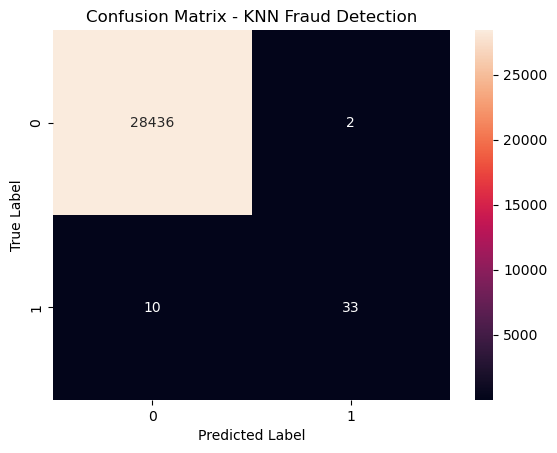

Accuracy: 0.9995786664794073
Precision: 0.9428571428571428
Recall: 0.7674418604651163
F1-score: 0.8461538461538461
ROC AUC: 0.8836857660156653


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time  
from sklearn.metrics import confusion_matrix

df = pd.read_csv(r"C:\Users\Dell\Downloads\Credit card fraud detection\creditcard.csv")
df = df.drop('V27', axis=1)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)


end_time = time.time()

training_time = end_time - start_time
y_pred = knn_classifier.predict(X_test_scaled)

confusion_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix, annot=True, fmt="d")  

plt.title("Confusion Matrix - KNN Fraud Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

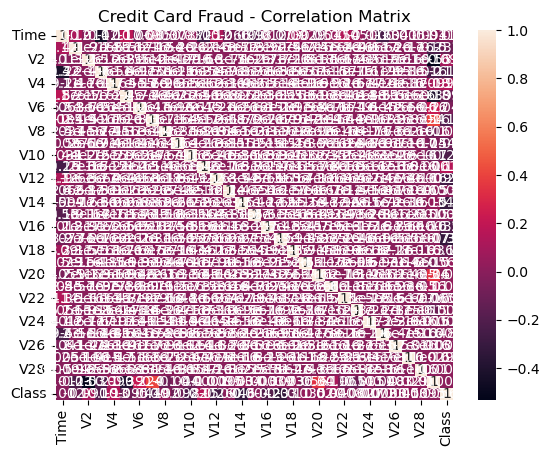

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)  

plt.title("Credit Card Fraud - Correlation Matrix")
plt.show()


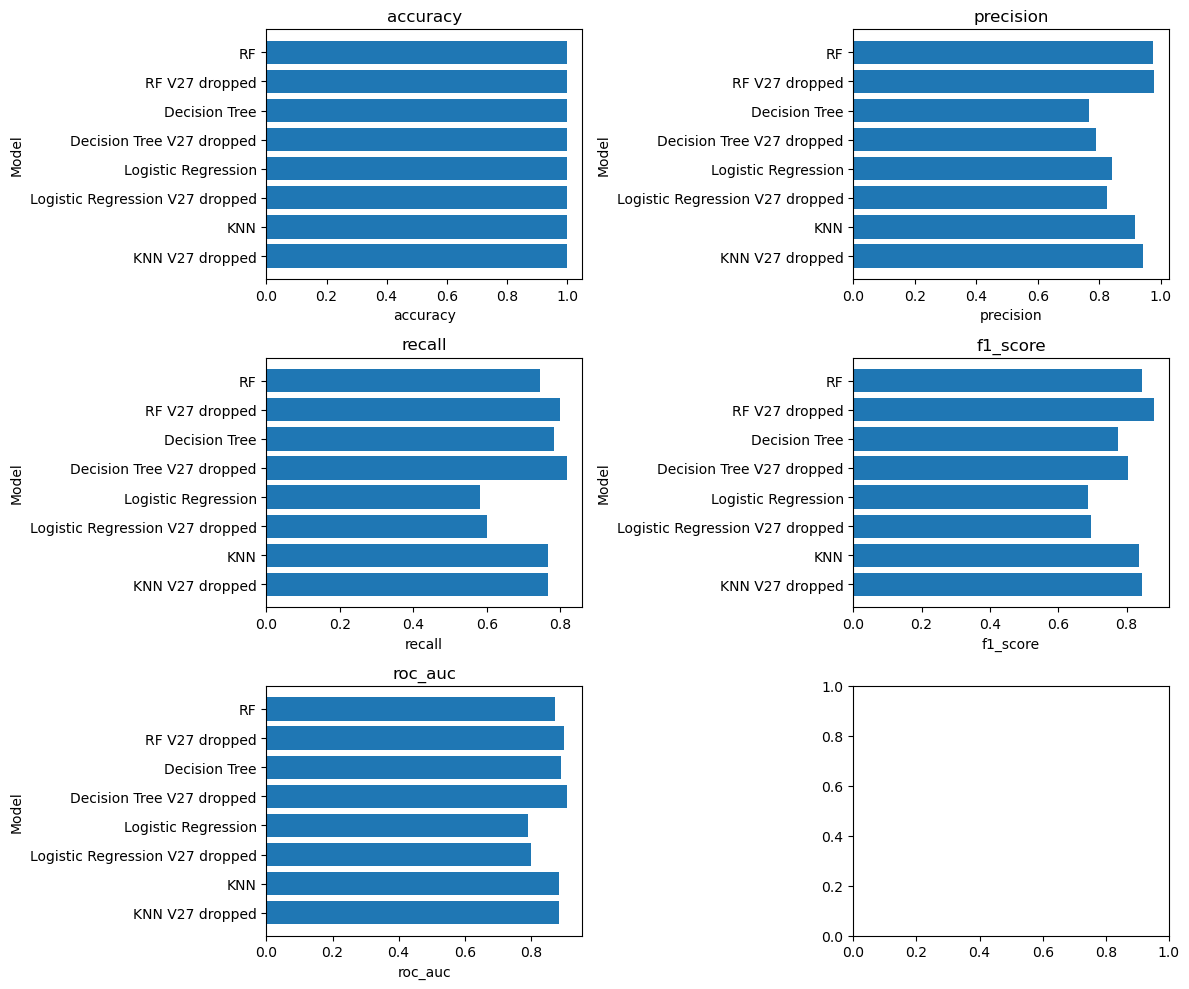

In [17]:
import matplotlib.pyplot as plt

models = ['RF', 'RF V27 dropped', 'Decision Tree', 'Decision Tree V27 dropped', 'Logistic Regression', 'Logistic Regression V27 dropped', 'KNN', 'KNN V27 dropped']
accuracy = [0.999473, 0.999579, 0.999122, 0.999228, 0.998982, 0.998982, 0.999544, 0.999579]
precision = [0.9762, 0.9778, 0.7679, 0.7895, 0.8421, 0.8250, 0.9167, 0.9429]
recall = [0.7455, 0.8000, 0.7818, 0.8182, 0.5818, 0.6000, 0.7674, 0.7674]
f1_score = [0.8454, 0.8800, 0.7748, 0.8036, 0.6882, 0.6947, 0.8354, 0.8462]
roc_auc = [0.8727, 0.8999, 0.8907, 0.9089, 0.7908, 0.7999, 0.8837, 0.8837]

# Choose the metrics you want to visualize
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']  # Select desired metrics

# Number of rows and columns for subplots (adjust as needed)
nrows = 3  # Increased to accommodate 5 metrics
ncols = 2

# Create a figure for all subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))  # Adjust figsize as needed

def create_bar_chart(metric, ax):
  """Creates a bar chart for a given metric with models on the y-axis."""
  ax.barh(models, globals()[metric])  # Models on y-axis
  ax.set_xlabel(metric)
  ax.set_ylabel('Model')
  ax.set_title(metric)
  ax.invert_yaxis()  # Invert y-axis for better readability

# Iterate over metrics and create subplots
for i, metric in enumerate(metrics):
  ax = axes.flat[i]  # Access subplot at index i
  create_bar_chart(metric, ax)

# Adjust layout (optional)
fig.tight_layout()

# Show the plot
plt.show()


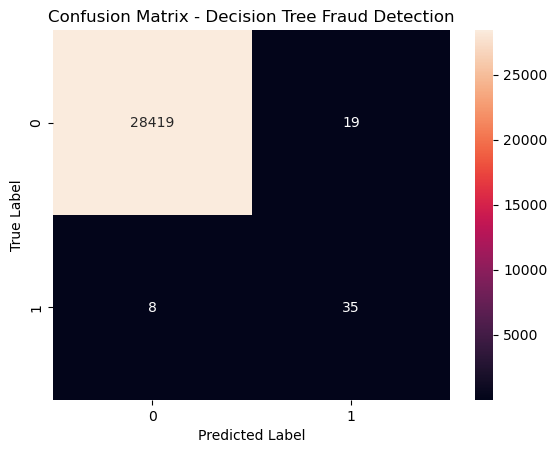

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix


dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

y_pred = dt_classifier.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Tree Fraud Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



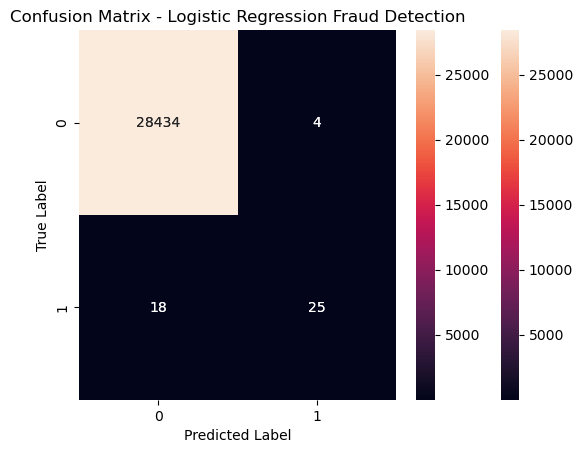

In [9]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)
y_pred = lr_classifier.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
sns.heatmap(conf_matrix, annot=True, fmt="d")  
plt.title("Confusion Matrix - Logistic Regression Fraud Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

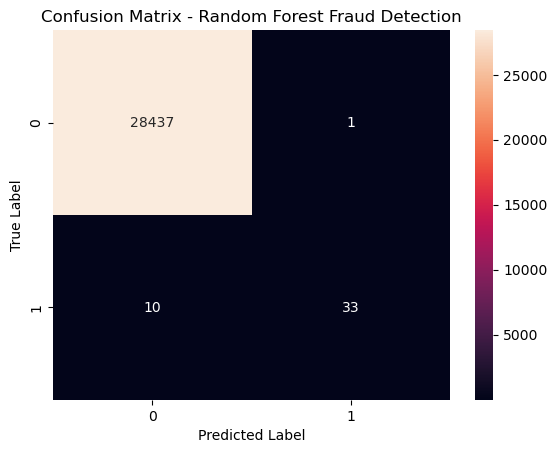

In [10]:
from sklearn.ensemble import RandomForestClassifier 
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")  
plt.title("Confusion Matrix - Random Forest Fraud Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()